In [4]:
# Import libraries
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
import yfinance as yf

In [2]:
def linreg(X,Y):
    X = sm.add_constant(X)
    model=regression.linear_model.OLS(Y,X).fit()
    a=model.params[0]
    b=model.params[1]
    X=X[:,1]

    X2 = np.linspace(X.min(),X.max(),100)
    Y_hat = X2*b + a
    plt.scatter(X,Y,alpha=0.3)
    plt.plot(X2,Y_hat,'r',alpha=0.9);
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     64.27
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           4.23e-14
Time:                        14:52:37   Log-Likelihood:                 549.18
No. Observations:                 251   AIC:                            -1094.
Df Residuals:                     249   BIC:                            -1087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.002      0.532      0.595      -0.002       0.004
x1             1.9541      0.244      8.017      0.000       1.474       2.434
==============================================================================
Omnibus:                       64.854   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.770
Skew:                           0.865   Prob(JB):                     1.53e-82
Kurtosis:                       8.748   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

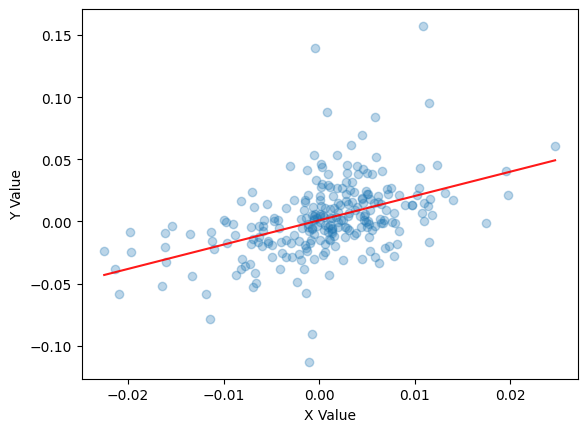

In [5]:
start = '2014-01-01'
end = '2015-01-01'
asset = yf.download('TSLA',start=start,end=end,auto_adjust=True)['Close']['TSLA']
benchmark = yf.download('SPY',start=start,end=end,auto_adjust=True)['Close']['SPY']

r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

linreg(r_b.values,r_a.values)

# Knowing Parameters vs. Estimates

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6997
Date:                Sat, 10 Jan 2026   Prob (F-statistic):              0.405
Time:                        15:13:15   Log-Likelihood:                -15.586
No. Observations:                 100   AIC:                             35.17
Df Residuals:                      98   BIC:                             40.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4260      0.060      7.087      0.000       0.307       0.545
x1             0.0852      0.102      0.836      0.405      -0.117       0.287
==============================================================================
Omnibus:                       16.345   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.751
Skew:                           0.137   Prob(JB):                       0.0929
Kurtosis:                       1.968   Cond. No.                         4.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

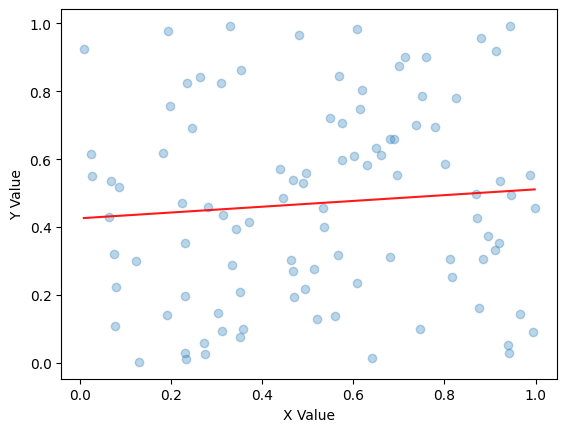

In [ ]:
X = np.random.rand(100)
Y = np.random.rand(100)
linreg(X,Y) # Prob (F-statistic):	0.405 < 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     231.4
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           1.52e-27
Time:                        15:15:06   Log-Likelihood:                 37.493
No. Observations:                 100   AIC:                            -70.99
Df Residuals:                      98   BIC:                            -65.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0374      0.035      1.057      0.293      -0.033       0.108
x1             0.9112      0.060     15.212      0.000       0.792       1.030
==============================================================================
Omnibus:                        2.818   Durbin-Watson:                   2.396
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                1.795
Skew:                          -0.062   Prob(JB):                        0.407
Kurtosis:                       2.355   Cond. No.                         4.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

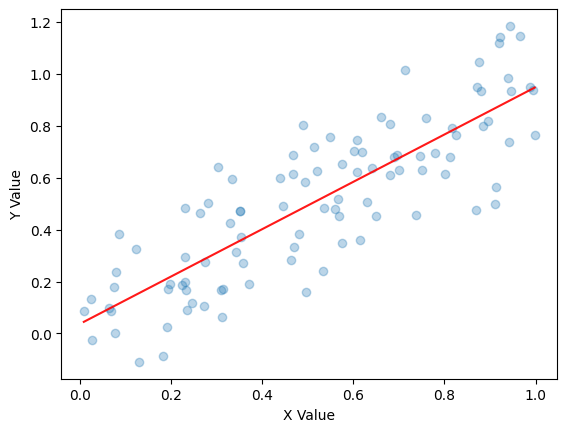

In [ ]:
Y = X + 0.2 *np.random.randn(100)

linreg(X,Y) # Prob (F-statistic):	1.52e-27 < 0.05

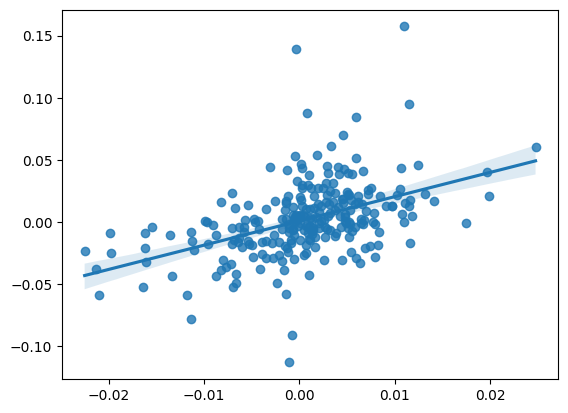

In [10]:
import seaborn

seaborn.regplot(x= r_b.values, y= r_a.values);

# 6. 요인 모델과 베타 헤징의 이해 

## Factor Models 소개

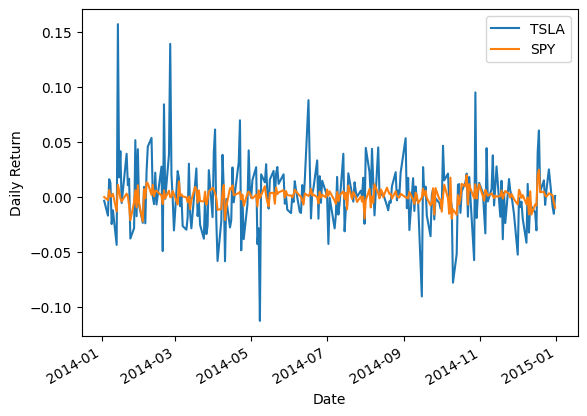

In [12]:
r_a.plot()
r_b.plot()
plt.ylabel("Daily Return")
plt.legend();

In [13]:
X = r_b.values
Y = r_a.values

def linreg(X,Y):
    X = sm.add_constant(X)
    model=regression.linear_model.OLS(Y,X).fit()

    X = X[:,1]

    return model.params[0],model.params[1]

alpha,beta = linreg(X,Y)
print('alpha: ' + str(alpha))
print('beta: ',str(beta))

alpha: 0.0009171552548585922
beta:  1.9541483651688631


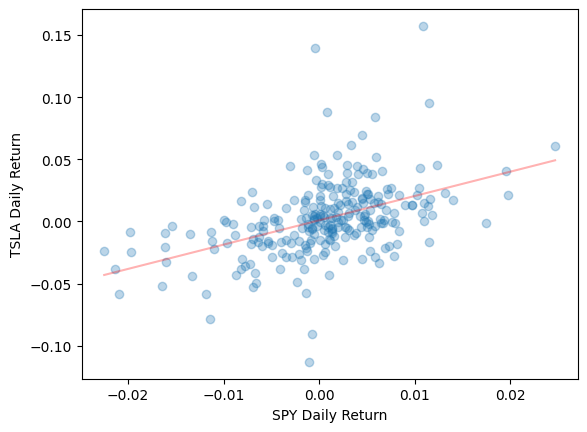

In [15]:
X2 = np.linspace(X.min(),X.max(),100)
Y_hat = X2 * beta + alpha

plt.scatter(X,Y,alpha=0.3)
plt.xlabel("SPY Daily Return")
plt.ylabel("TSLA Daily Return")

plt.plot(X2,Y_hat,'r',alpha=0.3);

# Inplementing Hedging

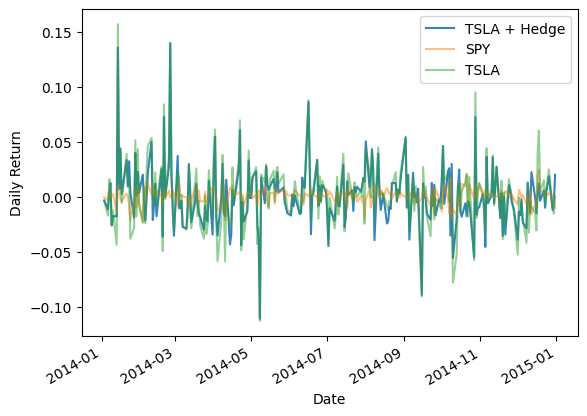

In [17]:
portfolio = -1 * beta*r_b + r_a
portfolio.name = "TSLA + Hedge"

portfolio.plot(alpha= 0.9)
r_b.plot(alpha=0.5);
r_a.plot(alpha = 0.5);
plt.ylabel('Daily Return')
plt.legend()